 Prepare a classification model using SVM for salary data 

Data Description:

age -- age of a person
workclass	-- A work class is a grouping of work 
education	-- Education of an individuals	
maritalstatus -- Marital status of an individulas	
occupation	 -- occupation of an individuals
relationship -- 	
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment	
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week	
native -- Native of an individual
Salary -- salary of an individual

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, normalize, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import svm
from sklearn.svm import SVC

In [2]:
df=pd.read_csv('SalaryData_Train(1).csv')
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.shape

(12952, 14)

In [4]:
df['Salary']=LabelEncoder().fit_transform(df['Salary'])
df['sex']=LabelEncoder().fit_transform(df['sex'])
df['occupation']=LabelEncoder().fit_transform(df['occupation'])
df['education']=LabelEncoder().fit_transform(df['education'])
df['workclass']=LabelEncoder().fit_transform(df['workclass'])

In [5]:
df.dtypes

age               int64
workclass         int32
education         int32
educationno       int64
maritalstatus    object
occupation        int32
relationship     object
race             object
sex               int32
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary            int32
dtype: object

In [6]:
df.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

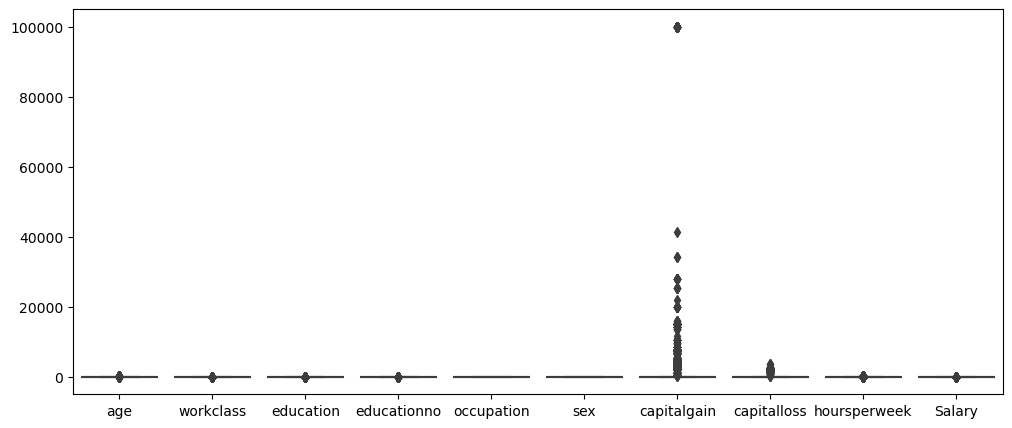

In [7]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df);

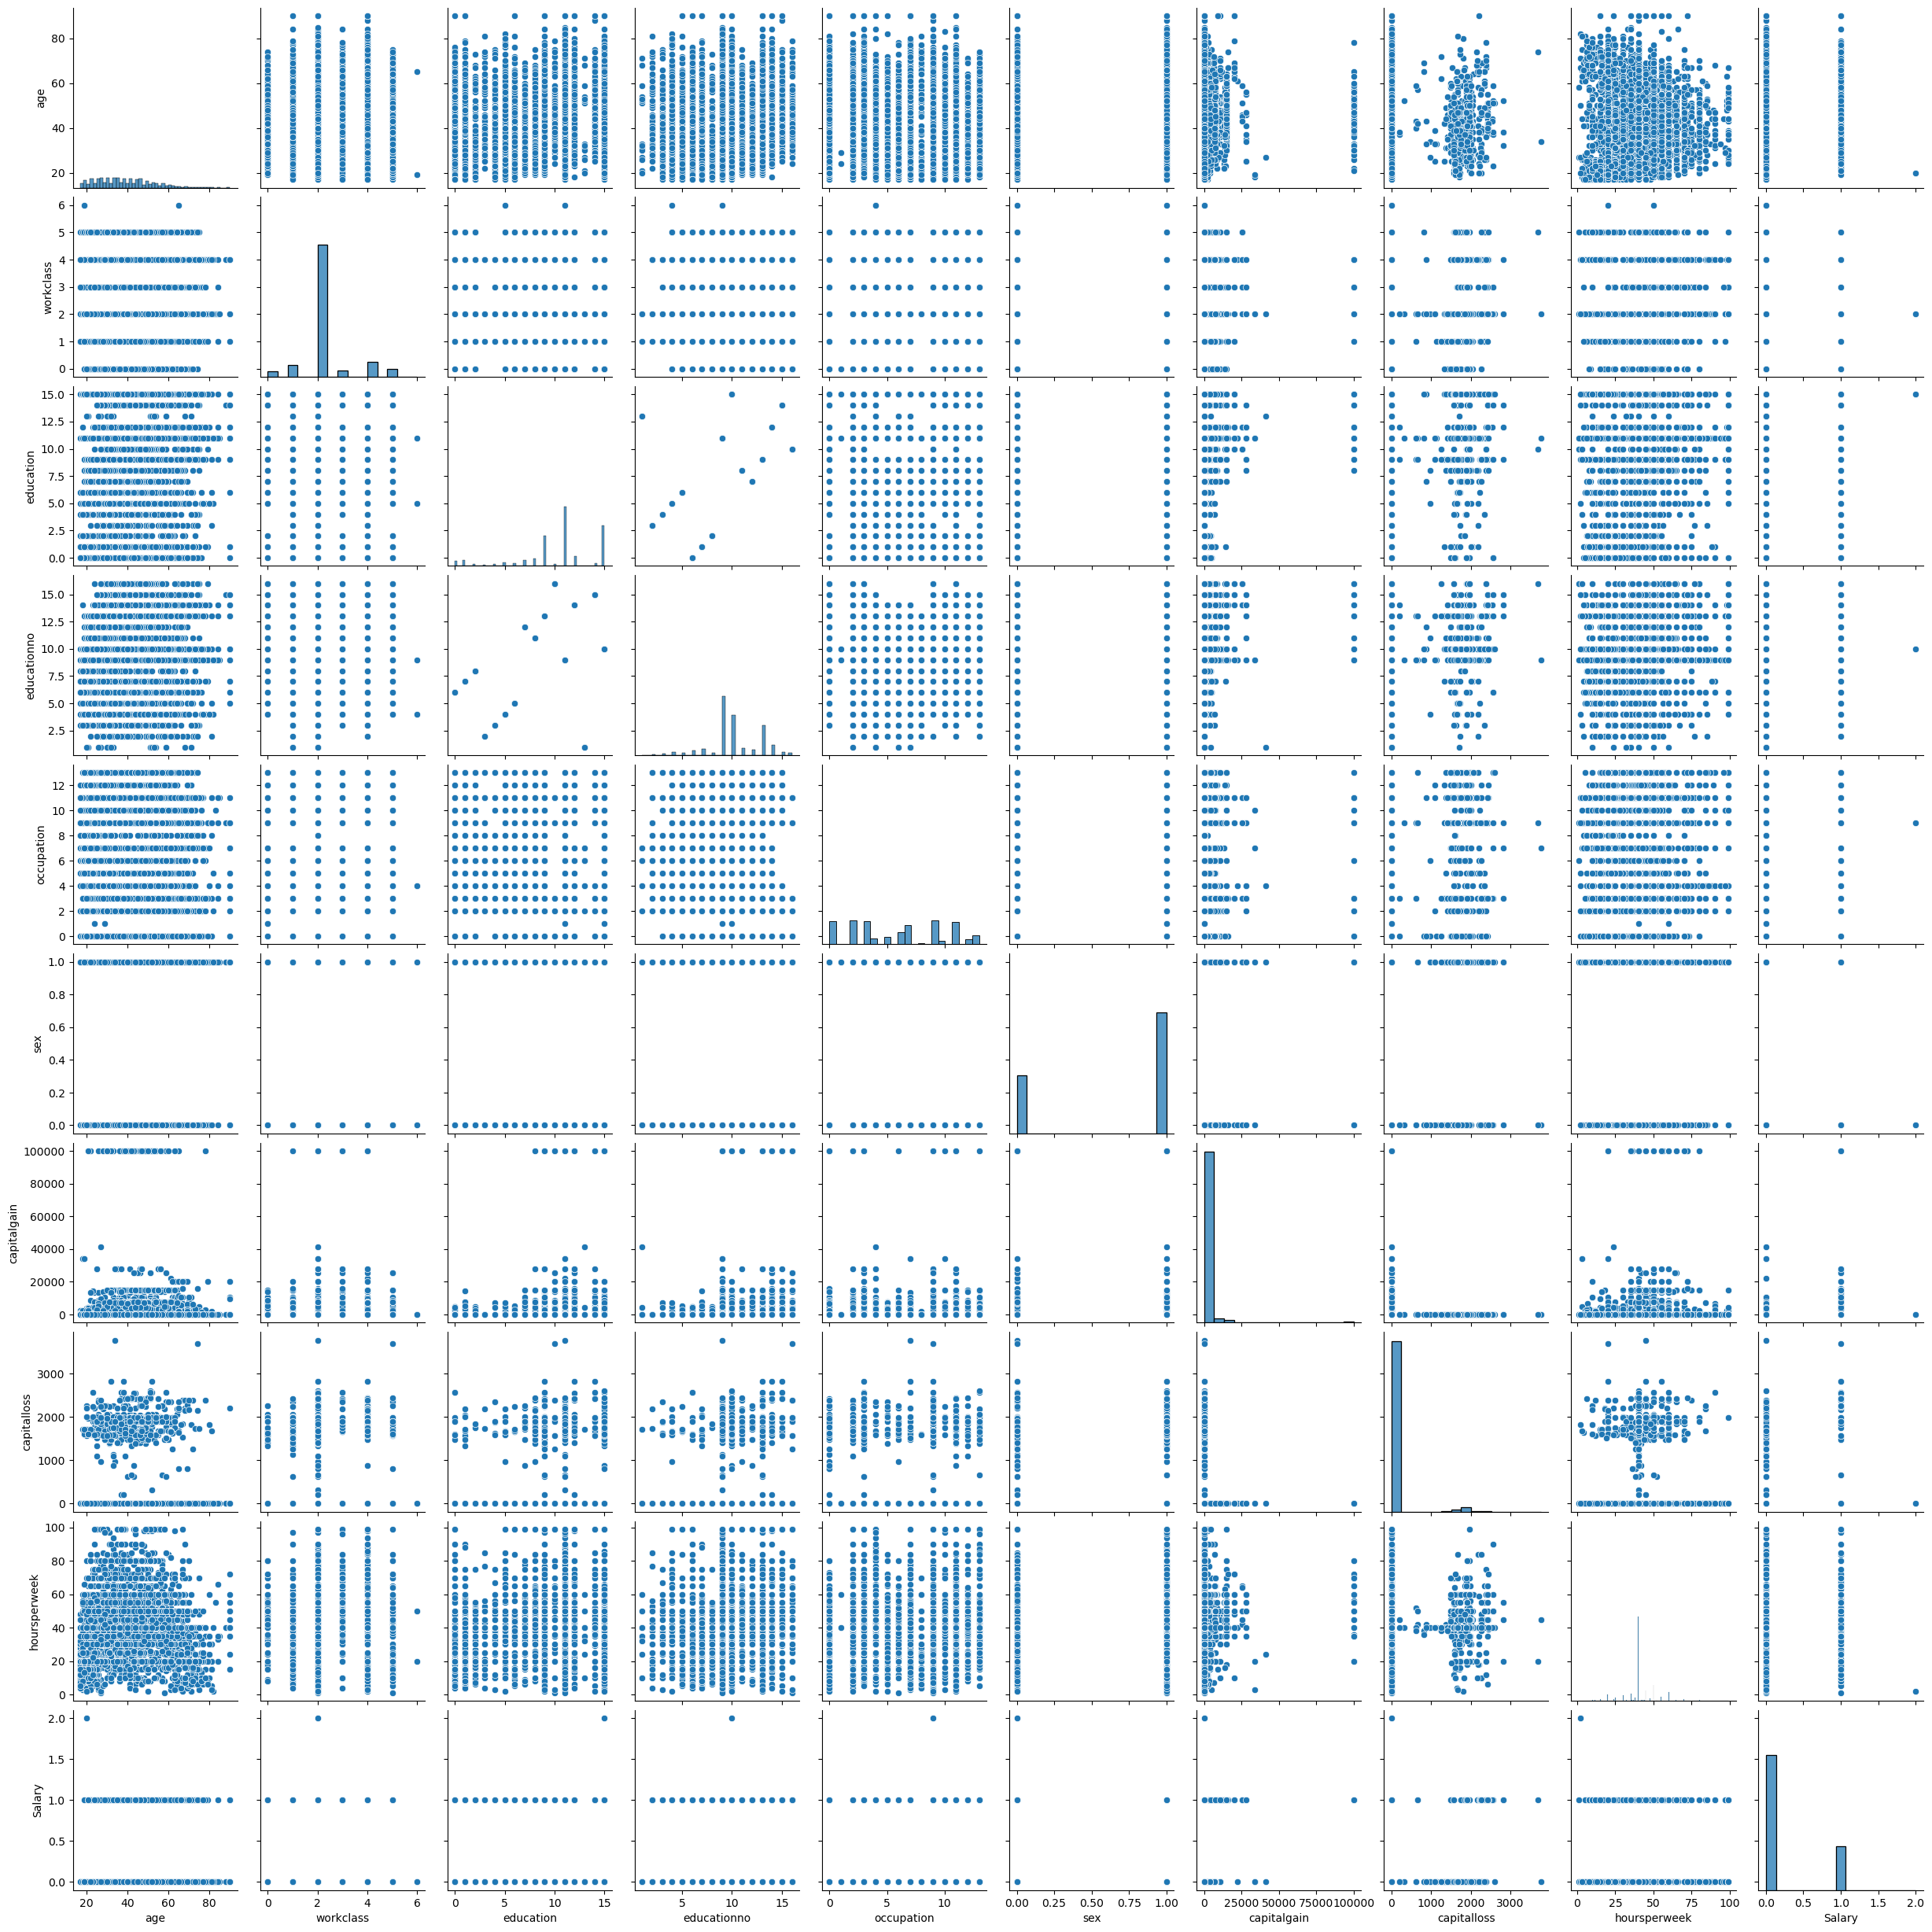

In [8]:
sns.pairplot(df)
plt.show()

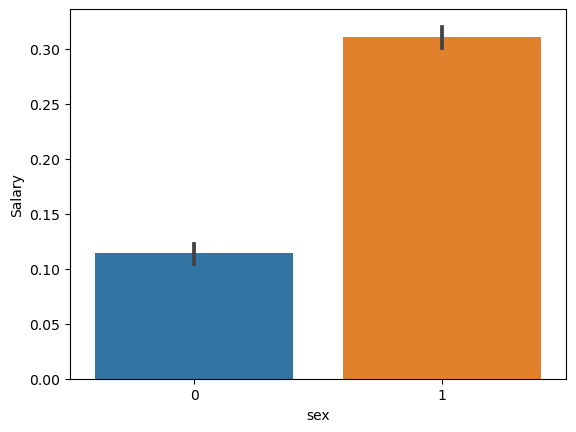

In [9]:
sns.barplot(x='sex',y='Salary',data=df)
plt.show()

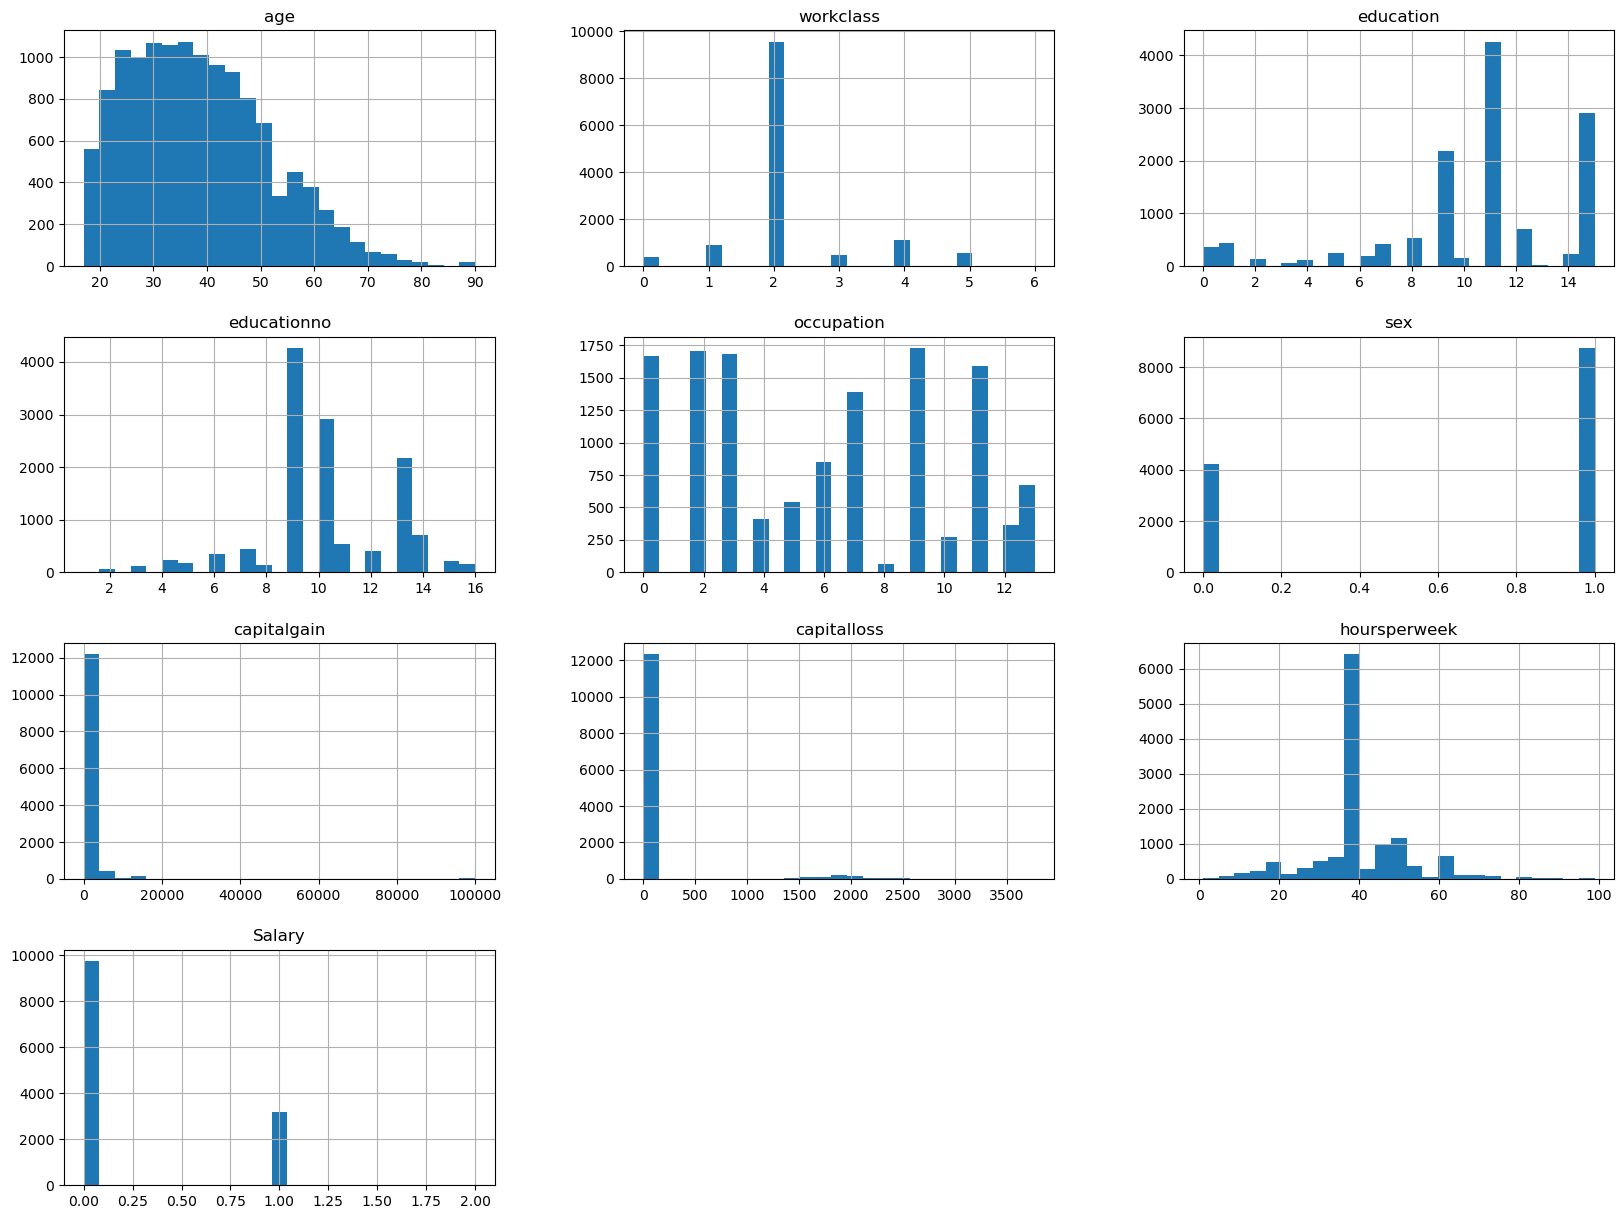

In [10]:
df.hist(bins=25, figsize=(20,15))
plt.show()

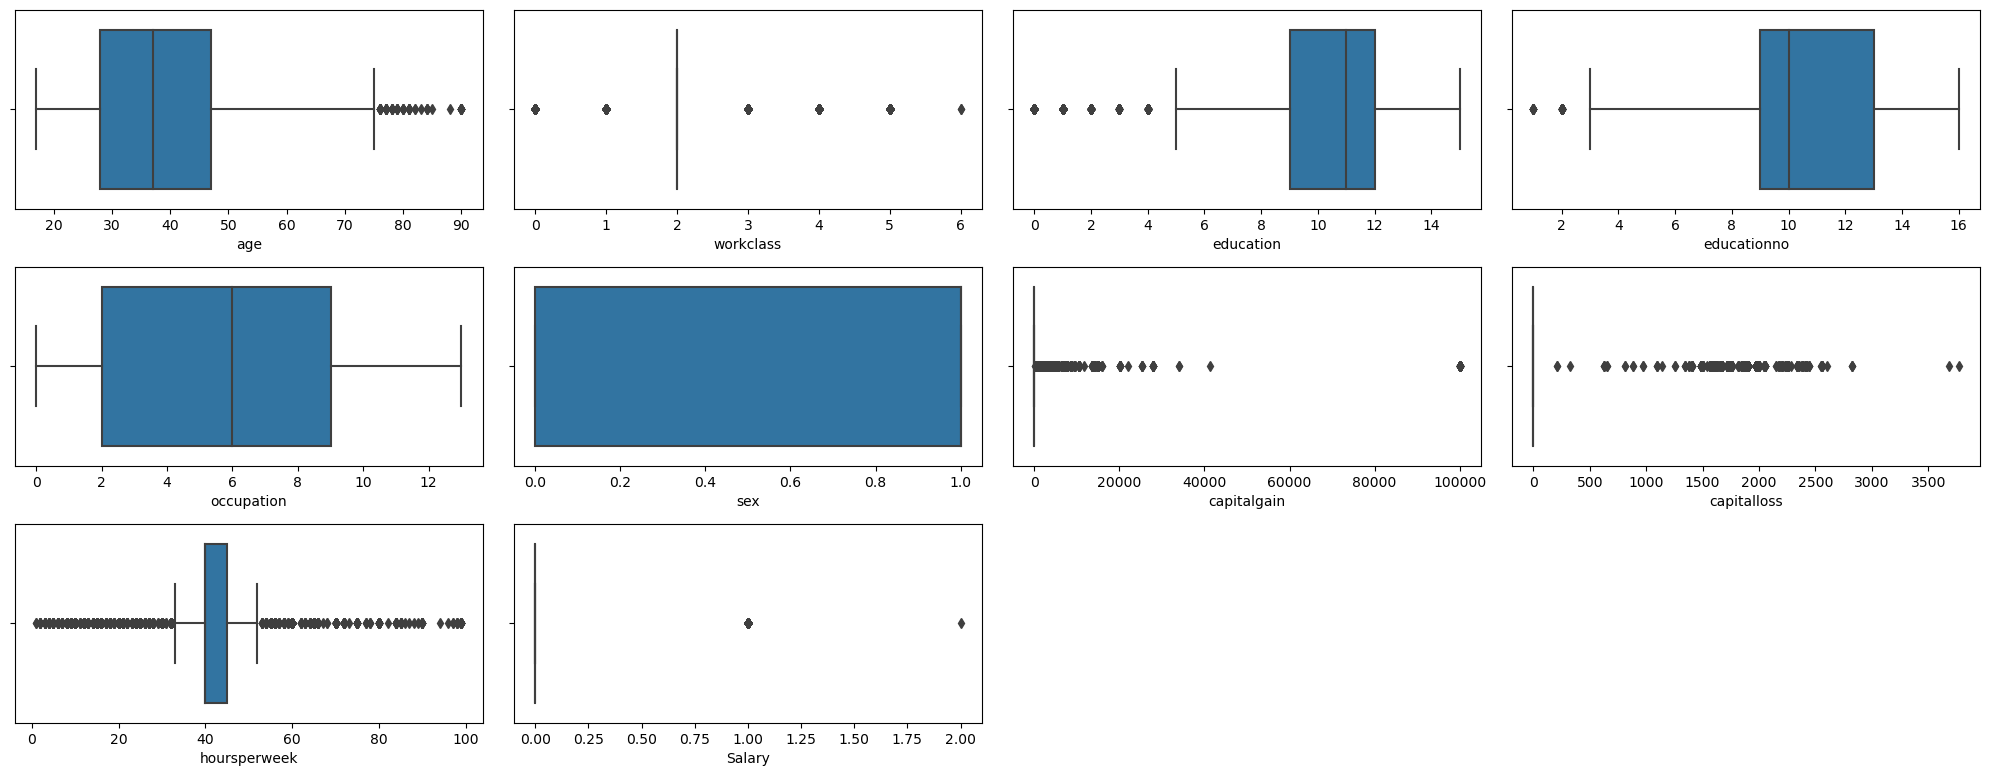

In [11]:
c=4
r=4
col=df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(20,10))
for i,co in enumerate(col):
    axis=size.add_subplot(r,c,i+1)
    sns.boxplot(x=df[co],ax=axis)
size.tight_layout()
plt.show()

In [12]:
df=df.drop(['maritalstatus','relationship','race','native'],axis=1)
df

,age,workclass,education,educationno,occupation,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,5,9,13,0,1,2174,0,40,0
1,50,4,9,13,3,1,0,0,13,0
2,38,2,11,9,5,1,0,0,40,0
3,53,2,1,7,5,1,0,0,40,0
4,28,2,9,13,9,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...
12947,44,2,12,14,2,1,15024,0,45,1
12948,19,2,11,9,7,0,0,0,13,0
12949,44,2,11,9,0,0,0,0,40,1
12950,40,2,11,9,2,1,0,0,40,0


In [13]:
def treatoutlier(df,cols):
    for col in cols:
        
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
    
        upper=Q3+1.5*IQR
        lower=Q1-1.5*IQR
    
        df[col]=np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))
treatoutlier(df,df.iloc[:,:-1].columns)

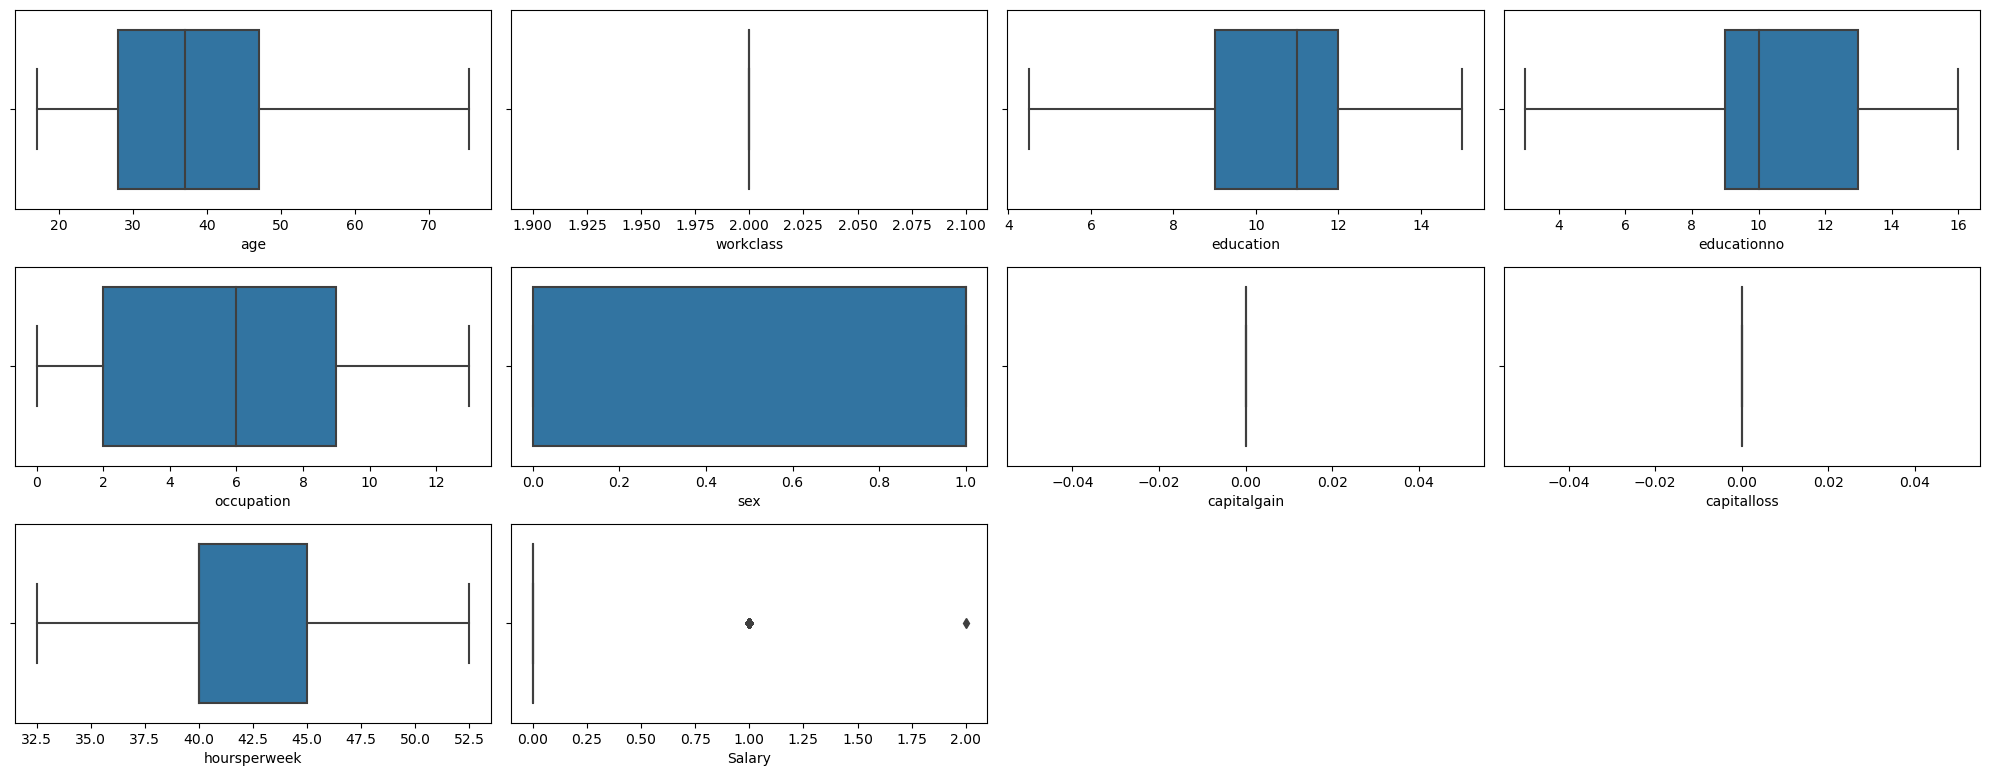

In [14]:
c=4
r=4
col=df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(20,10))
for i,co in enumerate(col):
    axis=size.add_subplot(r,c,i+1)
    sns.boxplot(x=df[co],ax=axis)
size.tight_layout()
plt.show()

In [15]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x=StandardScaler().fit_transform(x)

In [16]:
from sklearn.model_selection import GridSearchCV

clf=SVC()
param=[{'kernel':['linear','rbf'],'gamma':[0.5,0.1],'C':[10,0.1] }]
cls=GridSearchCV(clf,param,cv=5,verbose=200)
cls.fit(x,y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5; 1/8] START C=10, gamma=0.5, kernel=linear..............................


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV 1/5; 1/8] END C=10, gamma=0.5, kernel=linear;, score=0.788 total time=   9.9s
[CV 2/5; 1/8] START C=10, gamma=0.5, kernel=linear..............................
[CV 2/5; 1/8] END C=10, gamma=0.5, kernel=linear;, score=0.800 total time=   8.6s
[CV 3/5; 1/8] START C=10, gamma=0.5, kernel=linear..............................
[CV 3/5; 1/8] END C=10, gamma=0.5, kernel=linear;, score=0.804 total time=   9.9s
[CV 4/5; 1/8] START C=10, gamma=0.5, kernel=linear..............................
[CV 4/5; 1/8] END C=10, gamma=0.5, kernel=linear;, score=0.792 total time=   9.8s
[CV 5/5; 1/8] START C=10, gamma=0.5, kernel=linear..............................
[CV 5/5; 1/8] END C=10, gamma=0.5, kernel=linear;, score=0.798 total time=  11.1s
[CV 1/5; 2/8] START C=10, gamma=0.5, kernel=rbf.................................
[CV 1/5; 2/8] END ..C=10, gamma=0.5, kernel=rbf;, score=0.789 total time=  12.5s
[CV 2/5; 2/8] START C=10, gamma=0.5, kernel=rbf.................................
[CV 2/5; 2/8] END ..C=1

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [10, 0.1], 'gamma': [0.5, 0.1],
                          'kernel': ['linear', 'rbf']}],
             verbose=200)

In [17]:
cls.best_params_,cls.best_score_

({'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}, 0.8038918203642249)

In [18]:
#model is created based on best parameters
model=SVC(C=10,gamma=0.1,kernel='rbf').fit(x,y)
pred=model.predict(x)
print('training accuracy of the model',accuracy_score(y,pred))

training accuracy of the model 0.8071340333539222


In [19]:
test_df=pd.read_csv('SalaryData_Test(1).csv')
test_df['Salary']=LabelEncoder().fit_transform(test_df['Salary'])
test_df['sex']=LabelEncoder().fit_transform(test_df['sex'])
test_df['occupation']=LabelEncoder().fit_transform(test_df['occupation'])
test_df['education']=LabelEncoder().fit_transform(test_df['education'])
test_df['workclass']=LabelEncoder().fit_transform(test_df['workclass'])
test_df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,Never-married,6,Own-child,Black,1,0,0,40,United-States,0
1,38,2,11,9,Married-civ-spouse,4,Husband,White,1,0,0,50,United-States,0
2,28,1,7,12,Married-civ-spouse,10,Husband,White,1,0,0,40,United-States,1
3,44,2,15,10,Married-civ-spouse,6,Husband,Black,1,7688,0,40,United-States,1
4,34,2,0,6,Never-married,7,Not-in-family,White,1,0,0,30,United-States,0


In [20]:
x=test_df.iloc[:,[0,1,2,3,5,8,9,10,11]]
y=test_df.iloc[:,13]
x=StandardScaler().fit_transform(x)

In [21]:
#Predicting the test model,from the model which was created using train sets 

predict_test=model.predict(x)
predict_test
score_of_the_model=accuracy_score(y,predict_test)
print('Testing accuracy of the model',score_of_the_model)

Testing accuracy of the model 0.7873173970783532


In [22]:
# if kernal tric is linear
model=SVC(C=10,gamma=0.5,kernel='linear').fit(x,y)
pred=model.predict(x)
score_of_the_model=accuracy_score(y,predict_test)
print('Testing accuracy of the model',score_of_the_model)

Testing accuracy of the model 0.7873173970783532
